## Objective: Narrow down the set of job postings to those that are most similar to our resume in preparation for further analysis.

### Step 1: Transform job posting text and our resume into TFIDF vectors using scikit-learn’s TFIDF vectorizer class.

In [6]:
# Group library imports in the beginning

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction import text

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Fetch DataFrame from previous steps

jobs = pd.read_pickle('step1_df.pk')
jobs.head()

,title,body,bullets
0,"Quantitative Analyst - Boston, MA 02116","Quantitative Analyst - Boston, MA 02116\nQuant...",()
1,"Data Scientist - Mountain View, CA","Data Scientist - Mountain View, CA\nGroundTrut...","(Help senior members of the team to explore, d..."
2,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nA Bachelor or Ma...",(A Bachelor or Masters Degree in a highly quan...
3,Senior Natural Language Processing (NLP) Engin...,Senior Natural Language Processing (NLP) Engin...,(Join a small team creating a proprietary NLU ...
4,"FLEXO FOLDER GLUER OPER - McClellan, CA - McCl...","FLEXO FOLDER GLUER OPER - McClellan, CA - McCl...",()


In [39]:
# Load resume

resume = "/Users/samanthaberk/Documents/resume-job-posting-nlp-project/data/Liveproject Resume.txt"

with open(resume, 'r') as f:
    resume = f.read()

In [30]:
# Append resume to DataFrame

resume_dict = {'title': 'resume', 'body': my_resume, 'bullets': ''}
df_with_resume = jobs.append(pd.DataFrame(resume_dict, index=[0]))

In [41]:
# Perform TFIDF vectorization on DataFrame

vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(df_with_resume['body'])
type(matrix)

scipy.sparse.csr.csr_matrix

In [42]:
tfidf_jobs = matrix[:-1, :]
tfidf_resume = matrix[-1, :]

### Step 2: Compute the cosine similarity between the vectorized resume and the job postings using sklearn’s cosine similarity function.

In [43]:
# Get cosine distances

cos_sims = cosine_similarity(tfidf_jobs, tfidf_resume)
cos_sims.shape

(1328, 1)

### Step 3: Sort the job postings based on similarity to our resume, and choose an appropriate cutoff for selecting the most similar jobs. Store the most similar job postings in a new DataFrame for later use, and save the DataFrame to disk.

In [45]:
sorted_df = jobs.copy()
sorted_df['cosine_similarity'] = cos_sims

In [46]:
# sort the dataframe by cosine similarties from greatest to least
sorted_df.sort_values(by='cosine_similarity', ascending=False, inplace=True)

# rest the indext to run sequentially from 0
sorted_df.reset_index(inplace=True, drop=True)
sorted_df.head()

,title,body,bullets,cosine_similarity
0,Institutional Data and Research Analyst (6948U...,Institutional Data and Research Analyst (6948U...,(),0.143349
1,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.125523
2,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.121162
3,"Data Analyst (6256U) 1737 - 1737 - Berkeley, C...","Data Analyst (6256U) 1737 - 1737 - Berkeley, C...",(),0.117481
4,Senior Data Systems Analyst (0599U) - 1668 - 1...,Senior Data Systems Analyst (0599U) - 1668 - 1...,(),0.113083


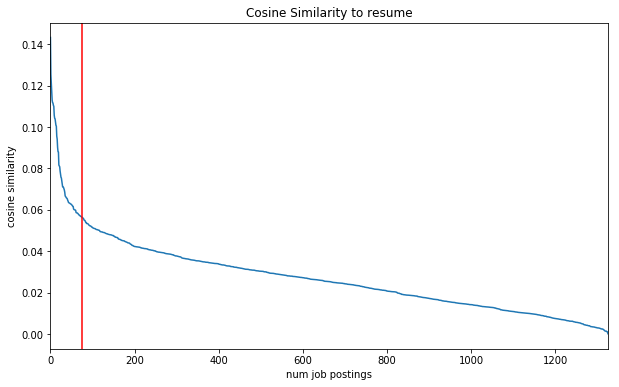

In [50]:
# Use matplot to see the shape of the similarities
plt.figure(figsize=(10,6))
sorted_df['cosine_similarity'].plot()
plt.title('Cosine Similarity to resume')
plt.xlabel('num job postings')
plt.ylabel('cosine similarity')
_= plt.axvline(75, c='r')